In [22]:
import pandas as pd
import numpy as np
import ydata_profiling as pp
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

In [4]:
df = pd.read_csv(r'C:\Users\monil\OneDrive\Desktop\monil Ms\733 Data mining\red_wine.csv')

In [5]:
df = df.drop_duplicates(keep = 'last')
len(df)

556

In [6]:
df['type'] = LabelEncoder().fit_transform(df['type'])
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,1
1,0.66,0.57,8.3,1
2,0.23,0.44,8.5,0
3,0.44,0.84,8.6,1
4,0.08,0.50,8.7,1


In [7]:
X = df.drop('type', axis = 1)
X.head()

,citric acid,sulphates,alcohol
0,0.49,0.63,8.0
1,0.66,0.57,8.3
2,0.23,0.44,8.5
3,0.44,0.84,8.6
4,0.08,0.50,8.7


In [8]:
y = df['type']
y.head(10)

0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: type, dtype: int32

In [9]:
test_size = 0.2  # the proportion of the data to include in the test split
random_state = 0  # the seed used by the random number generator

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [35]:
k = 10
kf = KFold(n_splits=k, random_state=None)

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)

#k-fold cross validation
ZeroR_result = cross_val_score(dummy_clf, X_test, y_test, cv = kf)

print("ZeroR Accuracy ", 100-(ZeroR_result.mean()*100))

ZeroR Accuracy  52.727272727272734


In [15]:
# Define the number of folds for cross-validation
num_folds = 10

# Create a KFold object with the specified number of folds
kfold = KFold(n_splits=num_folds, random_state=None)

# Create a logistic regression model with a maximum of 1000 iterations and a random seed of 0
lr_model = LogisticRegression(random_state=0, max_iter=1000)

# Train the logistic regression model on the training data
lr_model.fit(X_train, y_train)

# Compute the accuracy of the logistic regression model using cross-validation
lr_accuracy = cross_val_score(lr_model, X_test, y_test, cv=kfold).mean() * 100

# Print the logistic regression accuracy
print(f"Logistic Regression accuracy: {lr_accuracy}%")

Logistic Regression accuracy: 76.74242424242424%


In [16]:
# Initialize a list of zeros with the same length as y_test
prob = np.zeros(len(y_test))

# Predict the probabilities for X_test using model_lr
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculate the area under the ROC curve
lr_auc = roc_auc_score(y_test, lr_probs)

# Print the logistic regression AUC score
print(f"Logistic Regression AUC: {lr_auc}")

Logistic Regression AUC: 0.8991060025542784


In [23]:
k = 10
kf = KFold(n_splits=k, random_state=None)

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_test, y_test, cv=kf)

nb_accuracy = gnb_scores.mean() * 100
print("Naive Bayes accuracy: {:.2f}%".format(nb_accuracy))

Naive Bayes accuracy: 84.77%


In [26]:
# Initialize probability list
model_NB = GaussianNB()

# Train model on training data
model_NB.fit(X_train, y_train)

prob = [0] * len(y_test)

# Make Naive Bayes predictions on test set
NB_probs = model_NB.predict_proba(X_test)

# Extract probabilities of positive outcomes
NB_probs = NB_probs[:, 1]

# Calculate area under ROC curve (AUROC)
NB_auc = roc_auc_score(y_test, NB_probs)

# Print AUROC
print("Naive Bayes AUC: {}".format(NB_auc))

Naive Bayes AUC: 0.8863346104725415


In [27]:
k = 10

# Initialize KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=None)

# Create decision tree model and fit to training data
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)

# Perform k-fold cross validation
tree_result = cross_val_score(model_tree, X_test, y_test, cv=kf)

# Print accuracy of decision tree model
print(f"Decision Tree accuracy: {tree_result.mean()*100}%")

Decision Tree accuracy: 84.62121212121211%


In [28]:
#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
tree_probs = model_tree.predict_proba(X_test)

#keep postive outcomes 
tree_probs = tree_probs[:, 1]

#calculate AUROC
tree_auc = roc_auc_score(y_test, tree_probs)
print('Decision Tree AUC: ', tree_auc)

Decision Tree AUC:  0.7946998722860792


In [29]:
NUM_FOLDS = 10
kfold = KFold(n_splits=NUM_FOLDS, random_state=None)

svm_model = svm.SVC(kernel='poly', C=2, degree=3, tol=1e-3, max_iter=-1, coef0=0.05, gamma=0.1, probability=True)
svm_model.fit(X_train, y_train)
svm_accuracy = cross_val_score(svm_model, X_test, y_test, cv=kfold)

print(f"SVM accuracy: {svm_accuracy.mean() * 100}%")

SVM accuracy: 83.93939393939395%


In [31]:
prob = [0 for _ in range(len(y_test))]
SVM_probs = svm_model.predict_proba(X_test)

#keep postive outcomes 
SVM_probs = SVM_probs[:, 1]

#calculate AUROC
SVM_auc = roc_auc_score(y_test, SVM_probs)
print('SVM AUC: ', SVM_auc)

SVM AUC:  0.9067688378033206


In [32]:
k = 10
kf = KFold(n_splits=k, random_state=None)

model_rf = RandomForestClassifier(max_depth = 3, random_state = 0)
model_rf.fit(X_train,y_train)
RF_result = cross_val_score(model_rf, X_test, y_test, cv = kf)

print("Random Forest accuracy: {}".format(RF_result.mean()*100))

Random Forest accuracy: 86.66666666666666


In [34]:
prob = [0 for _ in range(len(y_test))]
rf_probs = model_rf.predict_proba(X_test)

#keep postive outcomes 
rf_probs = rf_probs[:, 1]

#calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest AUC: ', rf_auc)

Random Forest AUC:  0.9179438058748404


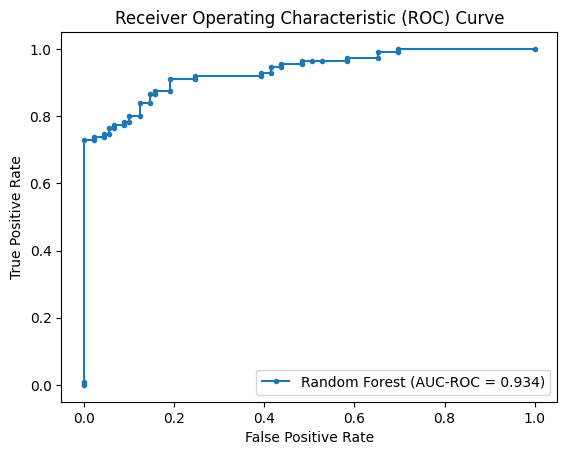

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC score for Random Forest model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve for Random Forest model
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC-ROC = {:.3f})'.format(rf_auc))

# Set plot title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend to plot and show
plt.legend()
plt.show()



In [36]:
df2 = pd.read_csv(r'C:\Users\monil\OneDrive\Desktop\monil Ms\733 Data mining\white_wine.csv')

In [38]:
X = df2.drop('type', axis = 1)
X.head()
X.shape

(78, 3)

In [39]:
y = df2['type']
y.head(10)
y.shape

(78,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test ", y_test.shape)

X_train:  (62, 3)
y_train:  (62,)
X_test:  (16, 3)
y_test  (16,)


In [41]:
prob = [0 for _ in range(len(y_test))]
rf_probs = model_rf.predict_proba(X_test)

#keep postive outcomes 
rf_probs = rf_probs[:, 1]

#calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest AUC: ', rf_auc)

Random Forest AUC:  0.923076923076923
